In [ ]:
import pandas as pd
import numpy as np
import re
import collections
try:
  import contractions
except:
  !pip install contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df=df[["v1","v2"]]
df.columns = ["SpamHam","Tweet"]
df

,SpamHam,Tweet
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["SpamHam"])
df["SpamHam"]=y

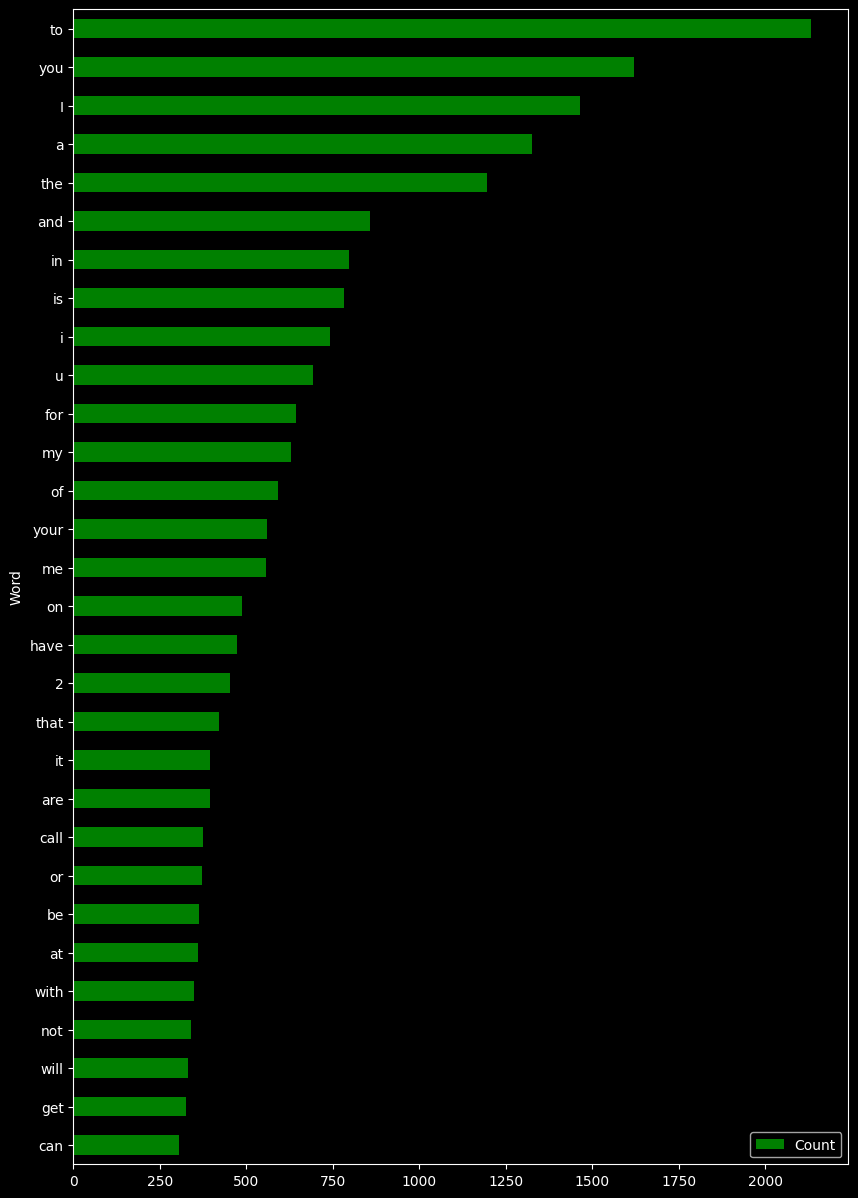

In [ ]:
def word_count_plot(data):
     # finding words along with count
    word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
    most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
    most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(df["Tweet"])

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
lem = WordNetLemmatizer()
import contractions
def preprocessing(data):
    sms = contractions.fix(data) # converting shortened words to original (Eg:"I'm" to "I am")
    sms = data.lower() # lower casing the sms
    sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
    sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
    sms = sms.split() #splitting
    # lemmatization and stopword removal
    sms = [lem.lemmatize(word) for word in sms ] #if not word in set(stopwords.words("english"))
    sms = " ".join(sms)
    return sms
X = df["Tweet"].apply(preprocessing)

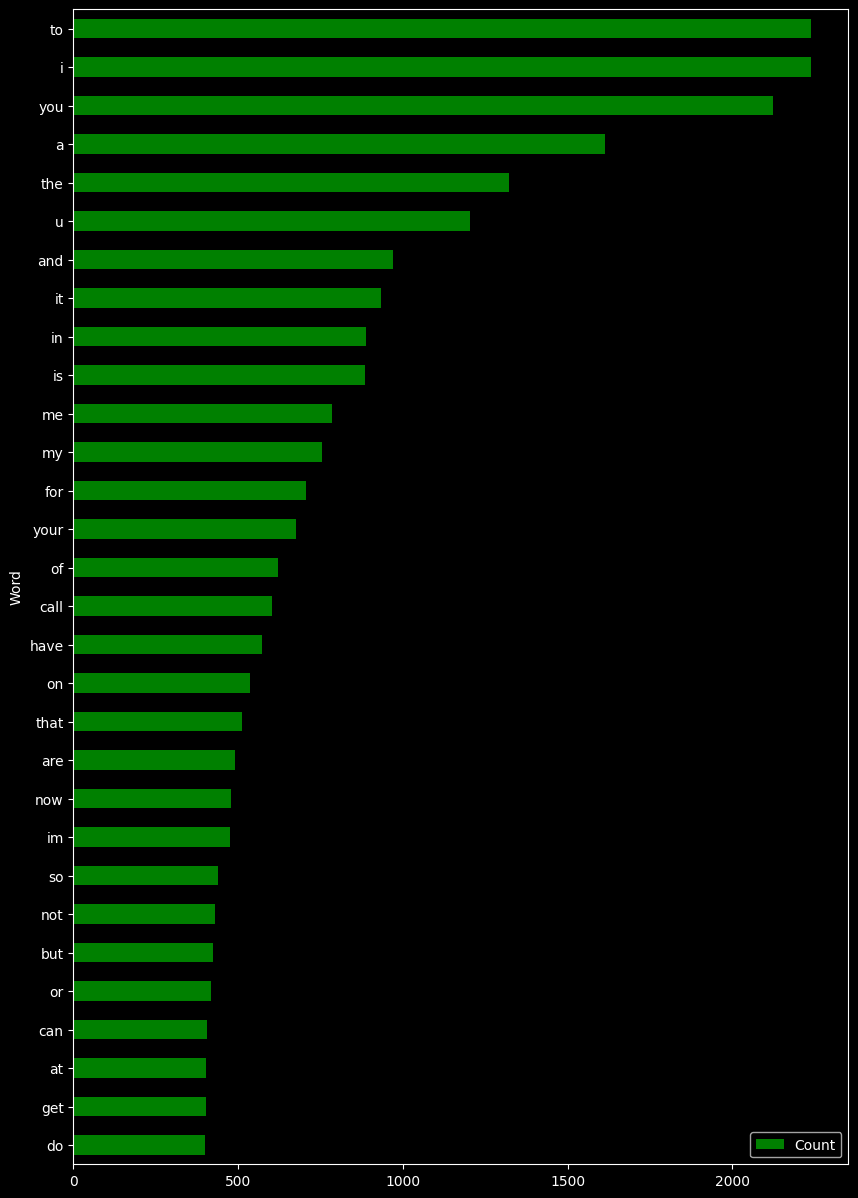

In [ ]:
word_count_plot(X)


In [ ]:
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(X)# fitting on the sms data
text_to_sequence = tokenizer.texts_to_sequences(X) # creating the numerical sequence

In [ ]:
for i in range(5):
           print("Text               : ",X[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
Numerical Sequence :  [40, 445, 3733, 361, 679, 652, 65, 9, 1174, 89, 120, 339, 983, 155, 2569, 1175, 63, 57, 3734, 139]
Text               :  ok lar joking wif u oni
Numerical Sequence :  [46, 320, 1318, 446, 6, 1693]
Text               :  free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [45, 461, 9, 4, 714, 855, 1, 171, 1694, 984, 605, 1695, 239, 271, 66, 1694, 1, 1, 321, 461, 2570, 77, 2571, 372, 190]
Text               :  u dun say so early hor u c already then say
Numerical Sequence :  [6, 232, 111, 23, 362, 2572, 6, 138, 147, 60, 111]
Text               :  nah i dont think he go to usf he life around here though
Numerical Sequence :  [908, 2, 42, 87, 64, 40, 1, 856, 64, 164, 204, 114, 462]


In [ ]:
#tokenizer.index_word # this will output a dictionary of index and words

In [ ]:
max_length_sequence = max([len(i) for i in text_to_sequence])
 # finding the length of largest sequence
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence,
                                    padding = "pre")
padded_sms_sequence

array([[   0,    0,    0, ...,   57, 3734,  139],
       [   0,    0,    0, ...,  446,    6, 1693],
       [   0,    0,    0, ..., 2571,  372,  190],
       ...,
       [   0,    0,    0, ..., 7990,  233, 3731],
       [   0,    0,    0, ...,    6,   13,   45],
       [   0,    0,    0, ...,    1,    8,  236]], dtype=int32)

In [ ]:
max_length_sequence

171

In [ ]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():

      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 171, 32)           255744    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 310985 (1.19 MB)
Trainable params: 31098

In [ ]:
TOT_SIZE

7992

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(padded_sms_sequence,y,test_size=0.3,random_state=42,shuffle=True)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_df = pd.DataFrame({'Class Label': np.unique(y_train), 'Class Weight': class_weights})

# Affichage du tableau des poids de classe
class_weight_df

,Class Label,Class Weight
0,0,0.578292
1,1,3.693182


In [ ]:
history=lstm_model.fit(X_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
122/122 [==============================] - 24s 162ms/step - loss: 0.2326 - accuracy: 0.9267
Epoch 2/20
122/122 [==============================] - 18s 151ms/step - loss: 0.0490 - accuracy: 0.9867
Epoch 3/20
122/122 [==============================] - 20s 161ms/step - loss: 0.0191 - accuracy: 0.9951
Epoch 4/20
122/122 [==============================] - 18s 144ms/step - loss: 0.0096 - accuracy: 0.9979
Epoch 5/20
122/122 [==============================] - 18s 145ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 6/20
122/122 [==============================] - 18s 151ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 7/20
122/122 [==============================] - 19s 152ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 8/20
122/122 [==============================] - 18s 144ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 9/20
122/122 [==============================] - 18s 145ms/step - loss: 0.0019 - accuracy: 0.9992
Epoch 10/20
122/122 [==============================] - 18s 145ms/step - l

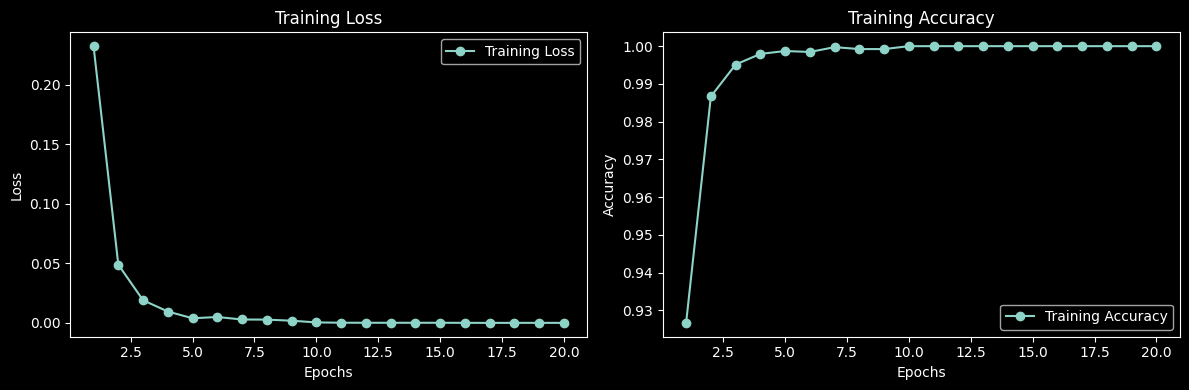

In [ ]:
# Extract training loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
y_pred=lstm_model.predict(X_test)
threshold = 0.5  # Binary threshold for classification
# Apply the threshold to y_pred to get binary predictions
y_pred_binary = (y_pred >= threshold).astype(int)
print(accuracy_score(y_pred_binary,y_test))
print(precision_score(y_pred_binary,y_test))
print(classification_report(y_pred_binary,y_test))
#y_pred

53/53 [==============================] - 2s 38ms/step
0.9844497607655502
0.9041095890410958
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1469
           1       0.90      0.98      0.94       203

    accuracy                           0.98      1672
   macro avg       0.95      0.98      0.96      1672
weighted avg       0.99      0.98      0.98      1672



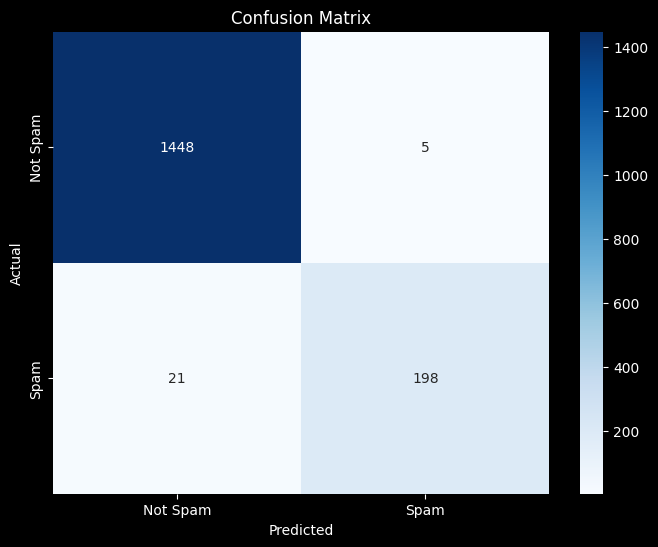

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_message = "WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
# Appliquez le prétraitement au message d'entrée
#preprocessed_message = preprocessing(input_message)
# Utilisez le modèle pour prédire le message d'entrée
input_sequence = tokenizer.texts_to_sequences([input_message])  # Assurez-vous que tokenizer est l'objet que vous avez utilisé pour tokeniser vos données d'entraînement
input_sequence = pad_sequences(input_sequence, maxlen=79)  # Assurez-vous de remplacer "maxlen" par la longueur maximale que votre modèle attend

# Faites la prédiction
prediction = lstm_model.predict(input_sequence)

# Interprétez la prédiction
threshold = 0.5  # Par exemple, un seuil de 0.5 pour décider si c'est un spam ou non
if prediction >= threshold:
    print("C'est un spam.")
else:
    print("Ce n'est pas un spam.")

1/1 [==============================] - 0s 440ms/step
C'est un spam.


In [ ]:
class_weights

array([0.57829181, 3.69318182])